In [1]:
# Training and testing notebook

In [2]:
# Section 1: Imports

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

train_10 = pd.read_csv("./preprocessing/pipeline/train_10.csv")
train_20 = pd.read_csv("./preprocessing/pipeline/train_20.csv")
train_30 = pd.read_csv("./preprocessing/pipeline/train_30.csv")
train_40 = pd.read_csv("./preprocessing/pipeline/train_40.csv")
train_50 = pd.read_csv("./preprocessing/pipeline/train_50.csv")
prices = pd.read_csv('./data/train.csv')['SalePrice']
print(prices.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [4]:
# Explicitly look at how many features in each feature set
# This is important because I removed some features from the 50
# and also added one feature to each
print('# Features in train_10', train_10.shape[1])
print('# Features in train_20', train_20.shape[1])
print('# Features in train_30', train_30.shape[1])
print('# Features in train_40', train_40.shape[1])
print('# Features in train_50', train_50.shape[1])

# Features in train_10 11
# Features in train_20 21
# Features in train_30 30
# Features in train_40 40
# Features in train_50 48


In [5]:
# Section 2: Apply Ordinary Least Squares to generate parameters

In [6]:
# Test for one feature set
from sklearn.linear_model import LinearRegression
import numpy as np

model_10 = LinearRegression()
model_10.fit(train_10, prices)

print("Coefficients:", model_10.coef_)
print("Intercept:", model_10.intercept_)

Coefficients: [140722.39334083  87470.20772325 249564.70529427   8247.45306094
  88298.95353024  12800.02976527  33394.57446276  41874.32778385
 -32278.79182237  -4596.01226346   -807.76472227]
Intercept: -22917.16248130257


In [7]:
# Repeat for all feature sets

remaining_sets = {20: train_20, 30: train_30, 40: train_40, 50: train_50}

models = {}
models[10] = model_10

for k, data in remaining_sets.items():
    model = LinearRegression()
    model.fit(data, prices)
    models[k] = model

print("Coefficients of 40", models[40].coef_)

Coefficients of 40 [ 97955.86681213  73119.66071735  68622.21401442  14206.92988103
  79738.24839299  -3239.04513539  53811.17155707 139968.63647978
 -31902.40019488 -18095.71591196 -12428.51820093   5686.68423278
   2622.83746847 -16804.73021654   4867.33009563 -14798.3075814
  62999.46033442   5732.49261409 -17118.53408355   3018.72932678
   4838.06985274  28129.31996725  84768.67163822  -8278.47149924
   1166.95482582   -686.56817557  -2168.93766855  11956.09816219
   -340.03146558   4779.25259781 -25565.23641758  32125.53878053
  54972.83748937   9351.59373626   3250.69143805   1220.23244984
  18017.14515604   4412.02271942    827.3620573   -5415.85074195]


In [8]:
# Section 3: Predict and evaluate on training data
price_predicted_train_10 = models[10].predict(train_10)
price_predicted_train_20 = models[20].predict(train_20)
price_predicted_train_30 = models[30].predict(train_30)
price_predicted_train_40 = models[40].predict(train_40)
price_predicted_train_50 = models[50].predict(train_50)
print(price_predicted_train_20)

[206216.66062843 172775.64926638 213114.79599852 ... 255070.81534642
 128667.442085   126410.36375772]


In [9]:
# Calculate MSE
from sklearn.metrics import mean_squared_error

mse_10 = mean_squared_error(prices, price_predicted_train_10)
mse_20 = mean_squared_error(prices, price_predicted_train_20)
mse_30 = mean_squared_error(prices, price_predicted_train_30)
mse_40 = mean_squared_error(prices, price_predicted_train_40)
mse_50 = mean_squared_error(prices, price_predicted_train_50)

In [10]:
# Calculate R^2
from sklearn.metrics import r2_score

r2_10 = r2_score(prices, price_predicted_train_10)
r2_20 = r2_score(prices, price_predicted_train_20)
r2_30 = r2_score(prices, price_predicted_train_30)
r2_40 = r2_score(prices, price_predicted_train_40)
r2_50 = r2_score(prices, price_predicted_train_50)

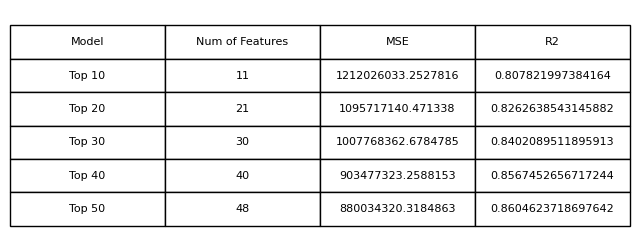

In [ ]:
# Visualize metrics
import matplotlib.pyplot as plt

# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "how do i create a table"
models_names = ['Top 10', 'Top 20', 'Top 30', 'Top 40','Top 50']
feature_count = [train_10.shape[1],train_20.shape[1],train_30.shape[1],train_40.shape[1],train_50.shape[1]]
mses = [mse_10,mse_20,mse_30,mse_40,mse_50]
r2s = [r2_10, r2_20, r2_30, r2_40, r2_50]

table_data = list(zip(models_names, feature_count, mses, r2s))
fig, ax = plt.subplots(figsize=(8,3))
ax.axis('off')  # hide axes

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=['Model','Num of Features', 'MSE', 'R2'],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(True)
table.scale(1, 2) 
plt.show()

In [12]:
# Choose a model
# I chose the Top 40 model because MSE and R^2 seem to continually
# by a good amount until between Top 40 and Top 50

final_model = models[40]
print('# Features in Final Model', train_40.columns)

# Features in Final Model Index(['OverallQual', 'Neighborhood', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF',
       'GarageArea', 'GarageCars', '1stFlrSF', 'MSSubClass', 'ExterQual_TA',
       'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'KitchenQual_TA',
       'TotRmsAbvGrd', 'ExterQual_Gd', '2ndFlrSF', 'Foundation_PConc',
       'KitchenQual_Gd', 'BsmtQual_TA', 'FireplaceQu_None', 'Fireplaces',
       'LotArea', 'Exterior2nd', 'BsmtFinSF1', 'GarageFinish_Unf',
       'OpenPorchSF', 'Exterior1st', 'GarageType_Attchd', 'HeatingQC_Ex',
       'BsmtUnfSF', 'BsmtQual_Ex', 'OverallCond', 'BsmtFinType1_GLQ',
       'GarageFinish_Fin', 'GarageType_Detchd', 'WoodDeckSF',
       'Foundation_CBlock', 'HeatingQC_TA', 'YrSold'],
      dtype='object')


In [13]:
# Apply model to test data
test_40 = pd.read_csv("./preprocessing/pipeline/test_40.csv")
price_predictions = final_model.predict(test_40)
print(price_predictions)
print(price_predictions.shape)

[111913.08221814 151483.18980946 185140.31778119 ... 186231.61013539
 112379.43386436 221685.86283596]
(1459,)


In [20]:
# Reappend IDs and save!
ids = pd.read_csv("./data/test.csv")[['Id']]
ids_series = ids['Id']
results = pd.DataFrame({'Id': ids_series, 'SalePrice': price_predictions})
print(results.head())
results.to_csv('predictions.csv', index=False)

     Id      SalePrice
0  1461  111913.082218
1  1462  151483.189809
2  1463  185140.317781
3  1464  209286.356356
4  1465  202142.591760
